In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/MALGUN.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import glob
import os

# 0. Data Road

In [10]:
elder_popcsv = pd.read_csv("D:\\WORK\\수원대학교\\BDAA 학회\\2023년 지역 치안 안전 데이터 분석 공모전 개최\\data\\elderly population by region.csv", encoding='cp949')
elder_caraccsv = pd.read_csv("D:\\WORK\\수원대학교\\BDAA 학회\\2023년 지역 치안 안전 데이터 분석 공모전 개최\\data\\elderly traffic accident.csv", encoding='cp949')
caraccsv = pd.read_csv("D:\\WORK\\수원대학교\\BDAA 학회\\2023년 지역 치안 안전 데이터 분석 공모전 개최\\data\\traffic accident.csv", encoding='cp949')

In [16]:
#유성구
muli_Yuseonggu_data = pd.read_csv("./data/data_c5.csv", encoding='cp949')
display(muli_Yuseonggu_data.head())
elder_caracc_Yuseonggu_data = pd.read_csv("./data/2020_고령교통사고수.csv",index_col=0)
display(elder_caracc_Yuseonggu_data.head())
flow_Yuseonggu_data = pd.read_csv("./data/2020_시간대별_유동인구.csv",index_col=0)
display(flow_Yuseonggu_data.head())


,법정동이름,차량등록대수,교통사고수,경로당,cctv개수,노인보호구역,노인보호구역_cctv개수
0,가정동,446,85,0,13,0,0
1,갑동,334,67,1,6,0,0
2,계산동,3910,0,4,16,1,0
3,관평동,11014,415,11,29,2,2
4,교촌동,2501,67,3,12,1,0


,법정동이름,고령교통사고수
0,봉명동,26
1,원내동,15
2,구암동,11
3,장대동,11
4,지족동,9


,법정동이름,새벽,저녁,주간,출근,퇴근
0,가정동,9523.85,27983.74,299278.13,24736.28,32003.84
1,세동,1101.18,8945.00,29825.66,2452.05,5224.31
2,송정동,34134.29,71788.25,130877.27,17653.16,35525.73
3,수남동,144471.35,329480.47,788031.33,92891.80,199287.94
4,신동,7314.33,22538.97,53013.90,4342.06,14310.27


In [10]:
large_targets = ['전국','서울특별시', '대전광역시', '세종특별자치시', '충청남도']
targets = ['대전광역시', '세종특별자치시', '충청남도']
years = ['20'+str(x) for x in range(14, 24)]
targets, years

(['대전광역시', '세종특별자치시', '충청남도'],
 ['2014',
  '2015',
  '2016',
  '2017',
  '2018',
  '2019',
  '2020',
  '2021',
  '2022',
  '2023'])

# 1. 교통사고 데이터 처리

In [12]:
raw_data = caraccsv.iloc[1:,2:].T
raw_data = raw_data.iloc[:,::13]
raw_data = raw_data.astype(int)
raw_data.insert(0,"sum",raw_data.sum(axis=1))
raw_data =  raw_data.iloc[:,[0,1,6,8,12]]
raw_data.columns = large_targets
raw_data

,전국,서울특별시,대전광역시,세종특별자치시,충청남도
2014,223552,40792,5899,482,8360
2014.1,4762,400,100,20,405
2014.2,337497,57345,8893,850,12901
2015,232035,41665,6901,536,9421
2015.1,4621,376,97,19,382
2015.2,350400,58656,10413,887,14515
2016,220917,40039,7535,521,8962
2016.1,4292,348,99,25,388
2016.2,331720,55669,11315,792,13298
2017,216335,38625,7767,746,9241


In [13]:
carac= raw_data.iloc[::3]
carac


,전국,서울특별시,대전광역시,세종특별자치시,충청남도
2014,223552,40792,5899,482,8360
2015,232035,41665,6901,536,9421
2016,220917,40039,7535,521,8962
2017,216335,38625,7767,746,9241
2018,217148,38795,7554,795,8807
2019,229600,39258,8337,922,9404
2020,209654,35227,7215,813,8952
2021,203130,33913,7027,788,8423


In [14]:
carac_dead = raw_data.iloc[1::3]
carac_dead.index = years[:-2]
carac_dead

,전국,서울특별시,대전광역시,세종특별자치시,충청남도
2014,4762,400,100,20,405
2015,4621,376,97,19,382
2016,4292,348,99,25,388
2017,4185,343,86,18,351
2018,3781,304,93,20,354
2019,3349,250,77,15,308
2020,3081,219,66,7,261
2021,2916,243,59,16,265


In [15]:
carac_dead_ratio = carac_dead.div(carac)*100
carac_dead_ratio

,전국,서울특별시,대전광역시,세종특별자치시,충청남도
2014,2.130153,0.980584,1.695203,4.149378,4.844498
2015,1.991510,0.902436,1.405593,3.544776,4.054771
2016,1.942811,0.869153,1.313869,4.798464,4.329391
2017,1.934500,0.888026,1.107249,2.412869,3.798290
2018,1.741209,0.783606,1.231136,2.515723,4.019530
2019,1.458624,0.636813,0.923594,1.626898,3.275202
2020,1.469564,0.621682,0.914761,0.861009,2.915550
2021,1.435534,0.716539,0.839619,2.030457,3.146147


## 1. 교통사고 데이터 시각화

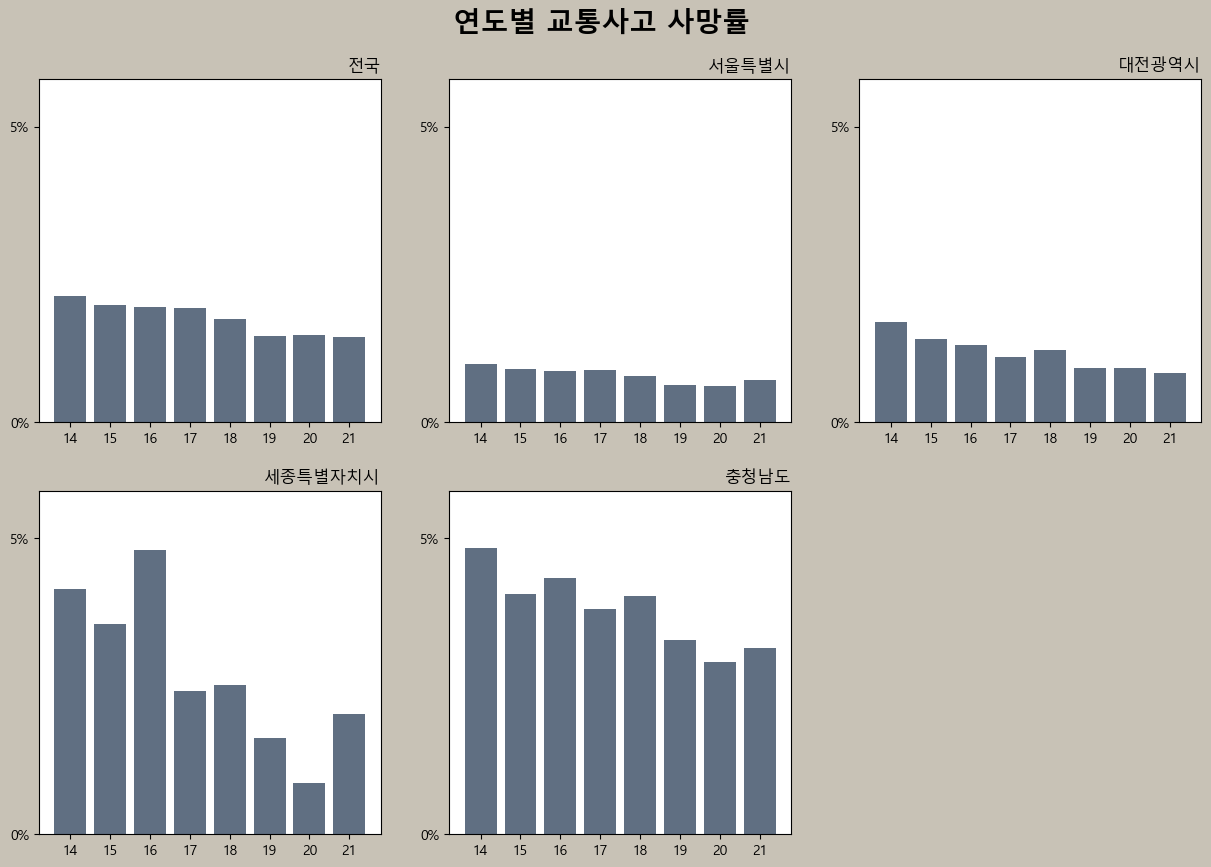

In [59]:
plt.figure(figsize=(15,10), dpi=100, facecolor='#C8C2B6')
max=carac_dead_ratio["세종특별자치시"].max()
min=carac_dead_ratio["서울특별시"].min()

for i, target in enumerate(large_targets):
    plt.subplot(2,3,i+1)
    # plt.axhline(7, color='#FF0044', linestyle='--', linewidth=0.7, alpha=0.7)
    # plt.axhline(14, color='#FF0044', linestyle='--', linewidth=0.7,alpha=0.7)
    # plt.axhline(20, color='#FF0044', linestyle='--', linewidth=0.7,alpha=0.7)
    plt.bar([year[2:4] for year in years[:-2]], carac_dead_ratio[target].values, color ="#606F82")
    plt.ylim(min, max+1)
    plt.yticks(list(range(0,10,5)),[str(x)+"%" for x in list(range(0,int(10),5))])
    plt.title(target, loc = "right")
plt.suptitle("연도별 교통사고 사망률",fontsize=20,y=0.95, fontweight = 'bold')

plt.savefig('carac_dead_ratio.jpeg')

In [55]:
list(range(0,int(max+1),5)),[str(x)+"%" for x in list(range(0,int(max+1),5))], max

([0], ['0%'], 4.798464491362764)

# 2. 노인 교통사고 데이터 처리

In [50]:
raw_data = elder_caraccsv.iloc[2:,1:].T
raw_data.columns = raw_data.iloc[0]
raw_data = raw_data.iloc[19:]
raw_data = raw_data["소계"]
raw_data = raw_data.iloc[:,[0,1,6,8,12]]
raw_data = raw_data.rename_axis(None, axis=1)
raw_data = raw_data.astype(float)
raw_data.columns = large_targets
raw_data

,전국,서울특별시,대전광역시,세종특별자치시,충청남도
2014,33170.0,5009.0,786.0,87.0,1796.0
2014.1,2887.0,517.0,140.0,-5.0,258.0
2014.2,9.5,11.5,21.7,-5.4,16.8
2014.3,1815.0,136.0,41.0,6.0,165.0
2014.4,-18.0,8.0,7.0,0.0,16.0
...,...,...,...,...,...
2021.4,-47.0,17.0,0.0,2.0,-17.0
2021.5,-3.5,19.8,0.0,100.0,-12.8
2021.6,37894.0,5027.0,1159.0,97.0,1882.0
2021.7,-253.0,-252.0,-43.0,-23.0,-120.0


In [18]:
elder_carac = raw_data.iloc[0::9]
elder_carac

,전국,서울특별시,대전광역시,세종특별자치시,충청남도
2014,33170.0,5009.0,786.0,87.0,1796.0
2015,36053.0,5388.0,929.0,100.0,1990.0
2016,35761.0,5219.0,1064.0,71.0,1983.0
2017,37555.0,5357.0,1099.0,112.0,2137.0
2018,38647.0,5761.0,1176.0,128.0,2109.0
2019,40645.0,5912.0,1268.0,134.0,2044.0
2020,35312.0,5056.0,1096.0,111.0,1869.0
2021,34907.0,4829.0,1075.0,95.0,1730.0


In [19]:
elder_carac_dead = raw_data.iloc[3::9]
elder_carac_dead.index = years[:-2]
elder_carac_dead

,전국,서울특별시,대전광역시,세종특별자치시,충청남도
2014,1815.0,136.0,41.0,6.0,165.0
2015,1814.0,139.0,36.0,11.0,164.0
2016,1732.0,128.0,38.0,9.0,161.0
2017,1767.0,139.0,27.0,4.0,145.0
2018,1682.0,121.0,34.0,8.0,186.0
2019,1523.0,103.0,34.0,8.0,149.0
2020,1342.0,86.0,27.0,2.0,133.0
2021,1295.0,103.0,27.0,4.0,116.0


In [20]:
elder_carac_dead_ratio = elder_carac_dead.div(elder_carac)*100
elder_carac_dead_ratio

,전국,서울특별시,대전광역시,세종특별자치시,충청남도
2014,5.471812,2.715113,5.216285,6.896552,9.187082
2015,5.031481,2.579807,3.875135,11.000000,8.241206
2016,4.843265,2.452577,3.571429,12.676056,8.119012
2017,4.705099,2.594736,2.456779,3.571429,6.785213
2018,4.352214,2.100330,2.891156,6.250000,8.819346
2019,3.747078,1.742219,2.681388,5.970149,7.289628
2020,3.800408,1.700949,2.463504,1.801802,7.116105
2021,3.709858,2.132947,2.511628,4.210526,6.705202


## 1. 노인 교통사고 데이터 시각화

In [57]:
max, min

(12.676056338028168, 1.7009493670886076)

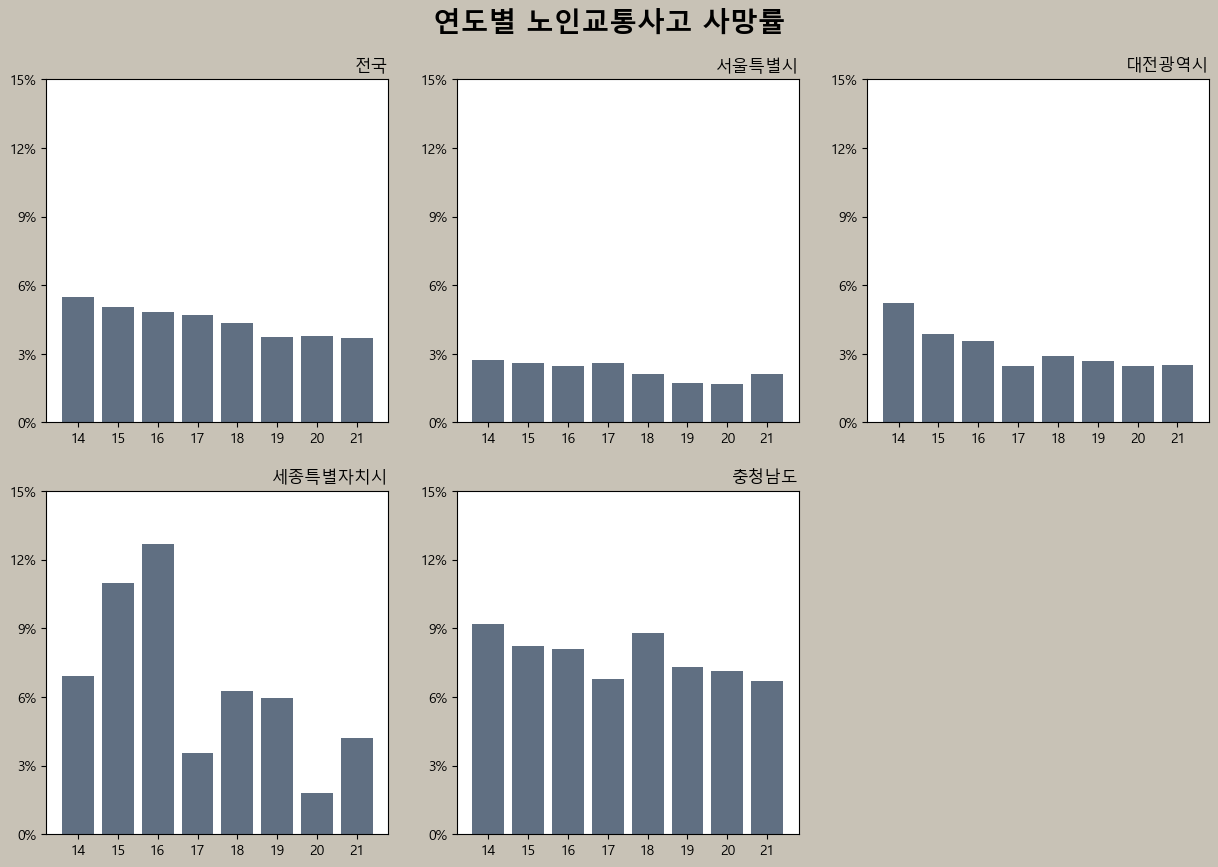

In [76]:
plt.figure(figsize=(15,10), dpi=100, facecolor='#C8C2B6')
# max=elder_carac_dead_ratio["세종특별자치시"].max()
# min=elder_carac_dead_ratio["서울특별시"].min()

for i, target in enumerate(large_targets):
    plt.subplot(2,3,i+1)
    # plt.axhline(7, color='#FF0044', linestyle='--', linewidth=0.7, alpha=0.7)
    # plt.axhline(14, color='#FF0044', linestyle='--', linewidth=0.7,alpha=0.7)
    # plt.axhline(20, color='#FF0044', linestyle='--', linewidth=0.7,alpha=0.7)
    plt.bar([year[2:4] for year in years[:-2]], elder_carac_dead_ratio[target].values, color ="#606F82")
    plt.ylim(min, max+1)
    plt.yticks(list(range(0,16,3)),[str(x)+"%" for x in list(range(0,int(16),3))])
    plt.title(target, loc = "right")
plt.suptitle("연도별 노인교통사고 사망률",fontsize=20,y=0.95, fontweight = 'bold')

plt.savefig('elder_carac_dead_ratio.jpeg')

## 2. 교통사고 사망률 비교 시각화

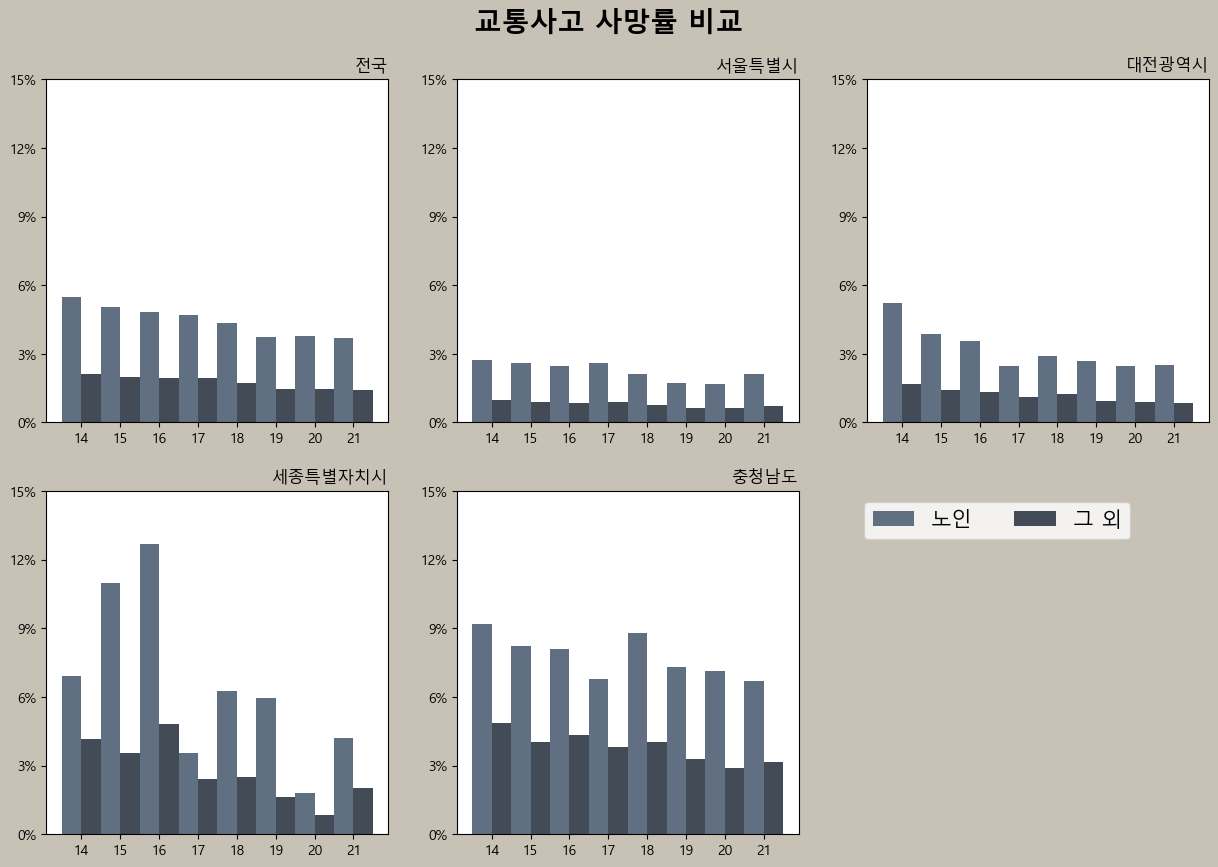

In [77]:
plt.figure(figsize=(15,10), dpi=100, facecolor='#C8C2B6')
# max=elder_carac_dead_ratio["세종특별자치시"].max()
# min=elder_carac_dead_ratio["서울특별시"].min()

for i, target in enumerate(large_targets):
    plt.subplot(2,3,i+1)
    # plt.axhline(7, color='#FF0044', linestyle='--', linewidth=0.7, alpha=0.7)
    # plt.axhline(14, color='#FF0044', linestyle='--', linewidth=0.7,alpha=0.7)
    # plt.axhline(20, color='#FF0044', linestyle='--', linewidth=0.7,alpha=0.7)
    plt.bar(range(8), elder_carac_dead_ratio[target].values, color ="#606F82", width=0.5)
    plt.bar(np.arange(8)+0.5, carac_dead_ratio[target].values, color ="#434B56",width=0.5 )
    plt.ylim(min, max+1)
    plt.xticks(np.arange(8)+0.25, [year[2:4] for year in years[:-2]])
    plt.yticks(list(range(0,16,3)),[str(x)+"%" for x in list(range(0,int(16),3))])
    plt.title(target, loc = "right")    
plt.legend(["노인", "그 외"],ncol=2, bbox_to_anchor = (2, 1), fontsize=15)
plt.suptitle("교통사고 사망률 비교",fontsize=20,y=0.95, fontweight = 'bold')

plt.savefig('compare_carac_dead_ratio.jpeg')

In [23]:
np.arange(10)+0.5

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])

# 3. 노인인구 데이터 처리

In [67]:
raw_data = elder_popcsv.iloc[1:,1:]
raw_data.columns = raw_data.iloc[0]
raw_data = raw_data.iloc[1:]
raw_data = raw_data.T
raw_data.columns = elder_popcsv["행정구역별(1)"][2:].reset_index(drop=True)
raw_data = raw_data.astype(float)
raw_data

행정구역별(1),전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
1,,,,,,,,,,,,,,,,,,
원데이터,1.230000e+01,1.150000e+01,1.330000e+01,1.160000e+01,9.900000e+00,1.040000e+01,9.900000e+00,8.000000e+00,14.600000,9.800000e+00,1.620000e+01,1.420000e+01,1.570000e+01,1.680000e+01,1.970000e+01,1.680000e+01,1.300000e+01,13.400000
전년동월 대비 증감,5.000000e-01,6.000000e-01,7.000000e-01,6.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,-0.600000,4.000000e-01,4.000000e-01,4.000000e-01,4.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,0.400000
증감률,4.237288e+00,5.504587e+00,5.555556e+00,5.454545e+00,5.319149e+00,5.050505e+00,5.319149e+00,6.666667e+00,-3.947368,4.255319e+00,2.531646e+00,2.898551e+00,2.614379e+00,3.067485e+00,2.604167e+00,3.067485e+00,4.000000e+00,3.076923
원데이터,6.279872e+06,1.167971e+06,4.700390e+05,2.909440e+05,2.840810e+05,1.526870e+05,1.515370e+05,9.212800e+04,18058.000000,1.201728e+06,2.502380e+05,2.228870e+05,3.212510e+05,3.136980e+05,3.754760e+05,4.541620e+05,4.333690e+05,79618.000000
전년동월 대비 증감,2.711150e+05,5.589700e+04,2.520900e+04,1.511700e+04,1.561200e+04,7.345000e+03,7.722000e+03,5.800000e+03,756.000000,6.015700e+04,7.759000e+03,6.909000e+03,1.029100e+04,9.057000e+03,8.222000e+03,1.492100e+04,1.693500e+04,3406.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
전년동월 대비 증감,4.101120e+05,6.004100e+04,2.999300e+04,1.797600e+04,2.832100e+04,9.442000e+03,1.134100e+04,1.081700e+04,2681.000000,1.110150e+05,1.647800e+04,1.510700e+04,1.653500e+04,1.250000e+04,1.196400e+04,2.123900e+04,2.976500e+04,4897.000000
증감률,4.607657e+00,3.739095e+00,4.375040e+00,4.284427e+00,6.457799e+00,4.404925e+00,5.095750e+00,7.018056e+00,7.097850,5.860860e+00,4.916707e+00,4.979350e+00,3.919983e+00,3.131835e+00,2.679297e+00,3.544642e+00,4.865192e+00,4.401798
원데이터,5.143002e+07,9.424873e+06,3.316107e+06,2.362880e+06,2.969502e+06,1.429816e+06,1.445806e+06,1.110074e+06,384496.000000,1.359609e+07,1.535373e+06,1.594459e+06,2.122913e+06,1.768229e+06,1.816707e+06,2.597527e+06,3.277672e+06,677493.000000


In [44]:
elder_pop = raw_data.iloc[3::9]
elder_pop = elder_pop.rename_axis(None, axis=1)
elder_pop.index = years
elder_pop

,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2014,6279872.0,1167971.0,470039.0,290944.0,284081.0,152687.0,151537.0,92128.0,18058.0,1201728.0,250238.0,222887.0,321251.0,313698.0,375476.0,454162.0,433369.0,79618.0
2015,6549277.0,1223221.0,494664.0,305141.0,299529.0,160620.0,159199.0,97922.0,19985.0,1260611.0,256465.0,229642.0,331915.0,323690.0,384415.0,468883.0,450704.0,82671.0
2016,6801505.0,1267890.0,516788.0,317644.0,314309.0,167123.0,166181.0,103722.0,22651.0,1325202.0,262507.0,235630.0,342168.0,334414.0,392555.0,480913.0,465551.0,86257.0
2017,7031367.0,1303079.0,539173.0,330990.0,326309.0,173562.0,172486.0,109423.0,24421.0,1382581.0,267222.0,242038.0,351366.0,342194.0,399944.0,494528.0,482483.0,89568.0
2018,7382628.0,1365618.0,567643.0,349175.0,346691.0,181513.0,181449.0,117299.0,27052.0,1474951.0,280686.0,253132.0,363640.0,351599.0,408637.0,514239.0,505988.0,93316.0
2019,7680143.0,1416167.0,592362.0,364537.0,364582.0,187753.0,189282.0,124597.0,29402.0,1559910.0,290428.0,262645.0,373504.0,359207.0,413359.0,530956.0,524963.0,96489.0
2020,8075536.0,1488747.0,623910.0,381786.0,387385.0,196550.0,199836.0,133618.0,32261.0,1663749.0,304479.0,274813.0,388385.0,372332.0,423672.0,551863.0,551246.0,100904.0
2021,8542313.0,1569328.0,661115.0,402487.0,414192.0,206509.0,212081.0,144360.0,35225.0,1788463.0,321208.0,289635.0,406914.0,387453.0,437022.0,576357.0,583326.0,106638.0
2022,8900662.0,1605763.0,685548.0,419566.0,438555.0,214351.0,222558.0,154131.0,37772.0,1894176.0,335143.0,303393.0,421813.0,399127.0,446535.0,599186.0,611795.0,111250.0
2023,9310774.0,1665804.0,715541.0,437542.0,466876.0,223793.0,233899.0,164948.0,40453.0,2005191.0,351621.0,318500.0,438348.0,411627.0,458499.0,620425.0,641560.0,116147.0


In [45]:
elder_pop_ratio = raw_data.iloc[0::9]
elder_pop_ratio = elder_pop_ratio.rename_axis(None, axis=1)
elder_pop_ratio.index = years
elder_pop_ratio.astype(float)
elder_pop_ratio

,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2014,12.3,11.5,13.3,11.6,9.9,10.4,9.9,8.0,14.6,9.8,16.2,14.2,15.7,16.8,19.7,16.8,13.0,13.4
2015,12.8,12.1,14.1,12.2,10.3,10.9,10.4,8.4,12.4,10.2,16.6,14.5,16.1,17.3,20.2,17.4,13.4,13.6
2016,13.2,12.7,14.7,12.8,10.7,11.3,10.9,8.8,10.5,10.6,16.9,14.9,16.5,17.9,20.6,17.8,13.8,13.8
2017,13.6,13.1,15.4,13.3,11.1,11.8,11.4,9.3,10.0,10.9,17.2,15.2,16.8,18.4,21.0,18.3,14.3,13.9
2018,14.3,13.9,16.4,14.1,11.7,12.4,12.1,10.1,9.6,11.4,18.1,15.9,17.2,19.0,21.6,19.1,15.0,14.2
2019,14.8,14.5,17.2,14.8,12.3,12.9,12.7,10.8,9.3,11.9,18.8,16.4,17.6,19.6,22.0,19.9,15.6,14.5
2020,15.6,15.3,18.3,15.7,13.1,13.5,13.6,11.6,9.4,12.6,19.8,17.2,18.3,20.5,22.7,20.7,16.4,15.0
2021,16.5,16.2,19.5,16.7,14.1,14.3,14.5,12.7,9.8,13.3,20.8,18.1,19.2,21.5,23.6,21.9,17.5,15.8
2022,17.2,16.9,20.5,17.6,14.9,14.9,15.3,13.7,10.1,14.0,21.8,19.0,19.9,22.4,24.4,22.8,18.5,16.4
2023,18.1,17.7,21.6,18.5,15.7,15.7,16.2,14.9,10.5,14.7,22.9,20.0,20.6,23.3,25.2,23.9,19.6,17.1


In [46]:
pop = raw_data.iloc[6::9]
pop = pop.rename_axis(None, axis=1)
pop.index = years
pop

,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2014,51156168.0,10143164.0,3526648.0,2501823.0,2882047.0,1473529.0,1533497.0,1157199.0,123802.0,12245960.0,1540745.0,1572779.0,2048438.0,1872297.0,1906363.0,2698306.0,3334948.0,594623.0
2015,51342881.0,10104515.0,3517898.0,2492658.0,2904876.0,1476891.0,1531287.0,1167232.0,161716.0,12366711.0,1543640.0,1578531.0,2063050.0,1871018.0,1904220.0,2699275.0,3351038.0,608325.0
2016,51541582.0,10018537.0,3513361.0,2487823.0,2927195.0,1472802.0,1518024.0,1173568.0,215418.0,12536474.0,1549193.0,1583982.0,2078572.0,1868354.0,1906904.0,2701160.0,3364764.0,625451.0
2017,51704332.0,9930478.0,3496779.0,2484688.0,2944009.0,1469583.0,1514354.0,1171656.0,244939.0,12728620.0,1549212.0,1591674.0,2097406.0,1863298.0,1902380.0,2698803.0,3374065.0,642388.0
2018,51779148.0,9851767.0,3467055.0,2474309.0,2950771.0,1464037.0,1501378.0,1164489.0,283198.0,12890445.0,1548078.0,1593903.0,2117685.0,1851694.0,1893444.0,2688747.0,3379981.0,658167.0
2019,51826287.0,9766288.0,3438259.0,2460382.0,2955916.0,1459832.0,1488725.0,1154786.0,316814.0,13090648.0,1541693.0,1599155.0,2125797.0,1834532.0,1878904.0,2674005.0,3373214.0,667337.0
2020,51847509.0,9733509.0,3411819.0,2436488.0,2956119.0,1456688.0,1474152.0,1147037.0,342328.0,13250368.0,1540540.0,1599391.0,2122455.0,1817302.0,1864712.0,2662508.0,3361344.0,670749.0
2021,51825932.0,9657969.0,3389388.0,2415813.0,2942452.0,1449115.0,1463291.0,1135370.0,357871.0,13449499.0,1541696.0,1599658.0,2119837.0,1802748.0,1850575.0,2637639.0,3338396.0,674615.0
2022,51632473.0,9505926.0,3348874.0,2383858.0,2949150.0,1441636.0,1451272.0,1121100.0,374377.0,13571450.0,1538660.0,1597097.0,2118638.0,1785392.0,1832604.0,2624310.0,3311438.0,676691.0
2023,51430018.0,9424873.0,3316107.0,2362880.0,2969502.0,1429816.0,1445806.0,1110074.0,384496.0,13596091.0,1535373.0,1594459.0,2122913.0,1768229.0,1816707.0,2597527.0,3277672.0,677493.0


## 1. 노인인구 데이터 시각화

0
1
2
3
4


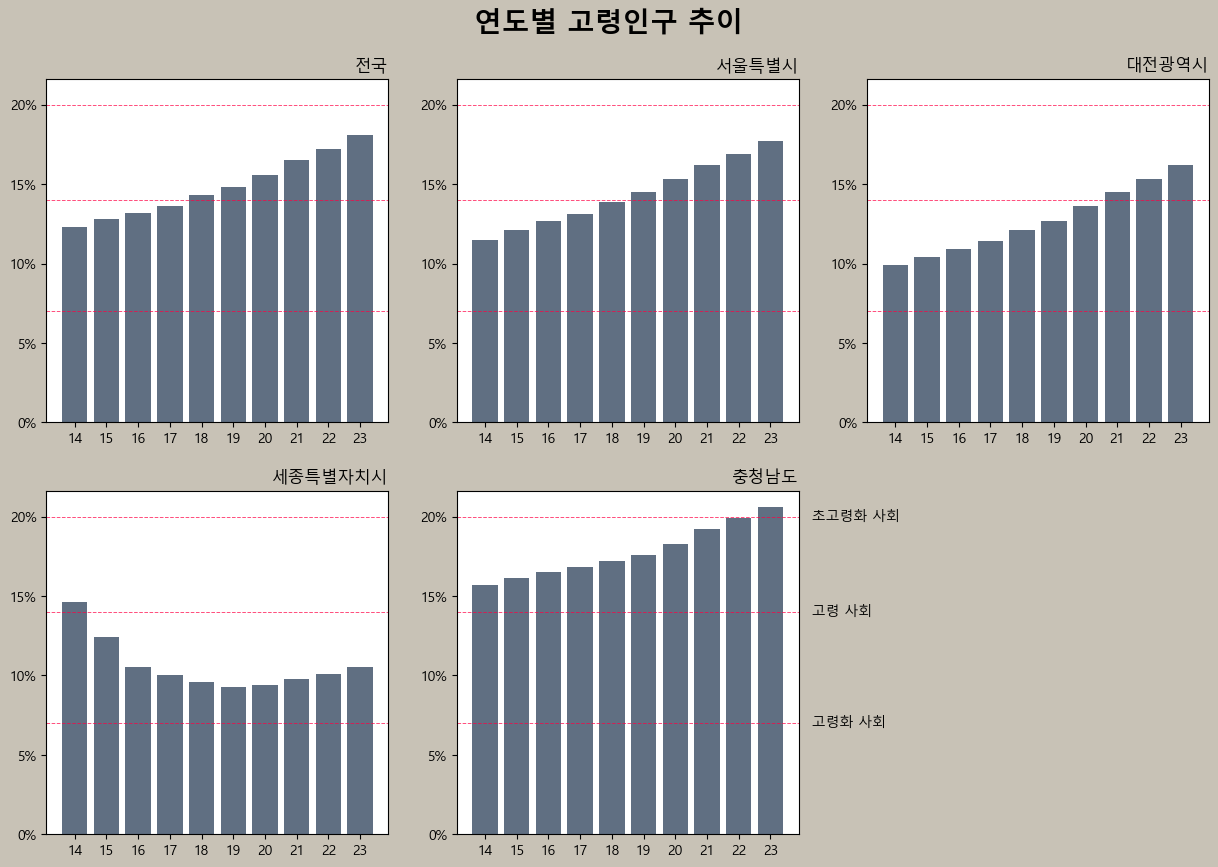

In [111]:
plt.figure(figsize=(15,10), dpi=100, facecolor='#C8C2B6')

max=elder_pop_ratio["충청남도"].max()
min=elder_pop_ratio["충청남도"].min()
for i, target in enumerate(large_targets):
    print(i)
    plt.subplot(2,3,i+1)
    if i == 4:
        plt.text(10,7,"  고령화 사회", va = "center")
        plt.text(10,14,"  고령 사회", va = "center")
        plt.text(10,20,"  초고령화 사회", va = "center")
    plt.axhline(7, color='#FF0044', linestyle='--', linewidth=0.7, alpha=0.7)
    plt.axhline(14, color='#FF0044', linestyle='--', linewidth=0.7,alpha=0.7)
    plt.axhline(20, color='#FF0044', linestyle='--', linewidth=0.7,alpha=0.7)
    plt.bar([year[2:4] for year in years], elder_pop_ratio[target].values, color ="#606F82")
    plt.ylim(min, max+1)
    plt.yticks(list(range(0,int(max+1),5)),[str(x)+"%" for x in list(range(0,int(max+1),5))])
    plt.title(target, loc = "right")
plt.suptitle("연도별 고령인구 추이",fontsize=20,y=0.95, fontweight = 'bold')

plt.savefig('elder_pop_ratio.jpeg')

In [4]:
data = pd.read_csv("data/지역별교통사고정보.csv",encoding='cp949')
data.head()

,연도,대상사고 구분명,법정동코드,사고건수,사고건수 구성비,사망자수,사망자수 구성비,치사율,부상자수,부상자수 구성비,...,중앙선 침범,신호위반,안전거리 미확보,안전운전 의무 불이행,보행자 보호의무 위반,기타,차대사람,차대차,차량단독,철길건널목
0,2010,전체,1100,41662,18.36,429,7.79,1.03,59718,16.94,...,1576.0,5202.0,6619.0,22088.0,2079.0,2908.0,10783.0,29579.0,1300.0,0.0
1,2010,어린이사고,1100,1930,13.69,14,11.11,0.73,2154,12.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,노인사고,1100,3528,13.67,125,7.13,3.54,3584,13.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,보행자사고,1100,10946,21.70,228,10.95,2.08,11233,22.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,자전거사고,1100,998,37.48,12,16.44,1.20,1036,37.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data[data["법정동코드"] == 2504]

,연도,대상사고 구분명,법정동코드,사고건수,사고건수 구성비,사망자수,사망자수 구성비,치사율,부상자수,부상자수 구성비,...,중앙선 침범,신호위반,안전거리 미확보,안전운전 의무 불이행,보행자 보호의무 위반,기타,차대사람,차대차,차량단독,철길건널목
2791,2010,전체,2504,773,0.35,21,0.39,2.72,1253,0.36,...,57.0,127.0,59.0,420.0,43.0,40.0,137.0,593.0,43.0,0.0
2792,2010,어린이사고,2504,53,0.38,0,0.00,0.00,72,0.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2793,2010,노인사고,2504,55,0.21,8,0.46,14.55,56,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2794,2010,보행자사고,2504,139,0.28,10,0.48,7.19,137,0.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2795,2010,자전거사고,2504,6,0.23,0,0.00,0.00,6,0.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34661,2021,고령운전사고,2504,237,0.74,4,0.56,1.69,332,0.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34662,2021,고령보행사고,2504,40,0.40,3,0.50,7.50,37,0.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34663,2021,개인형이동수단(PM)사고,2504,14,0.81,1,5.26,7.14,16,0.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34664,2021,뺑소니사고,2504,45,0.60,0,0.00,0.00,73,0.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 4. 대전시 유성구 교통 데이터 분석

## 1. 유성구 동별 2020년 고령교통사고수 시각화

In [19]:
elder_caracc_Yuseonggu_data.head()
elder_caracc_Yuseonggu_data[elder_caracc_Yuseonggu_data["고령교통사고수"] != 0]

,법정동이름,고령교통사고수
0,봉명동,26
1,원내동,15
2,구암동,11
3,장대동,11
4,지족동,9


Text(0.5, 0.93, '유성구 동별 2020년 고령교통사고수')

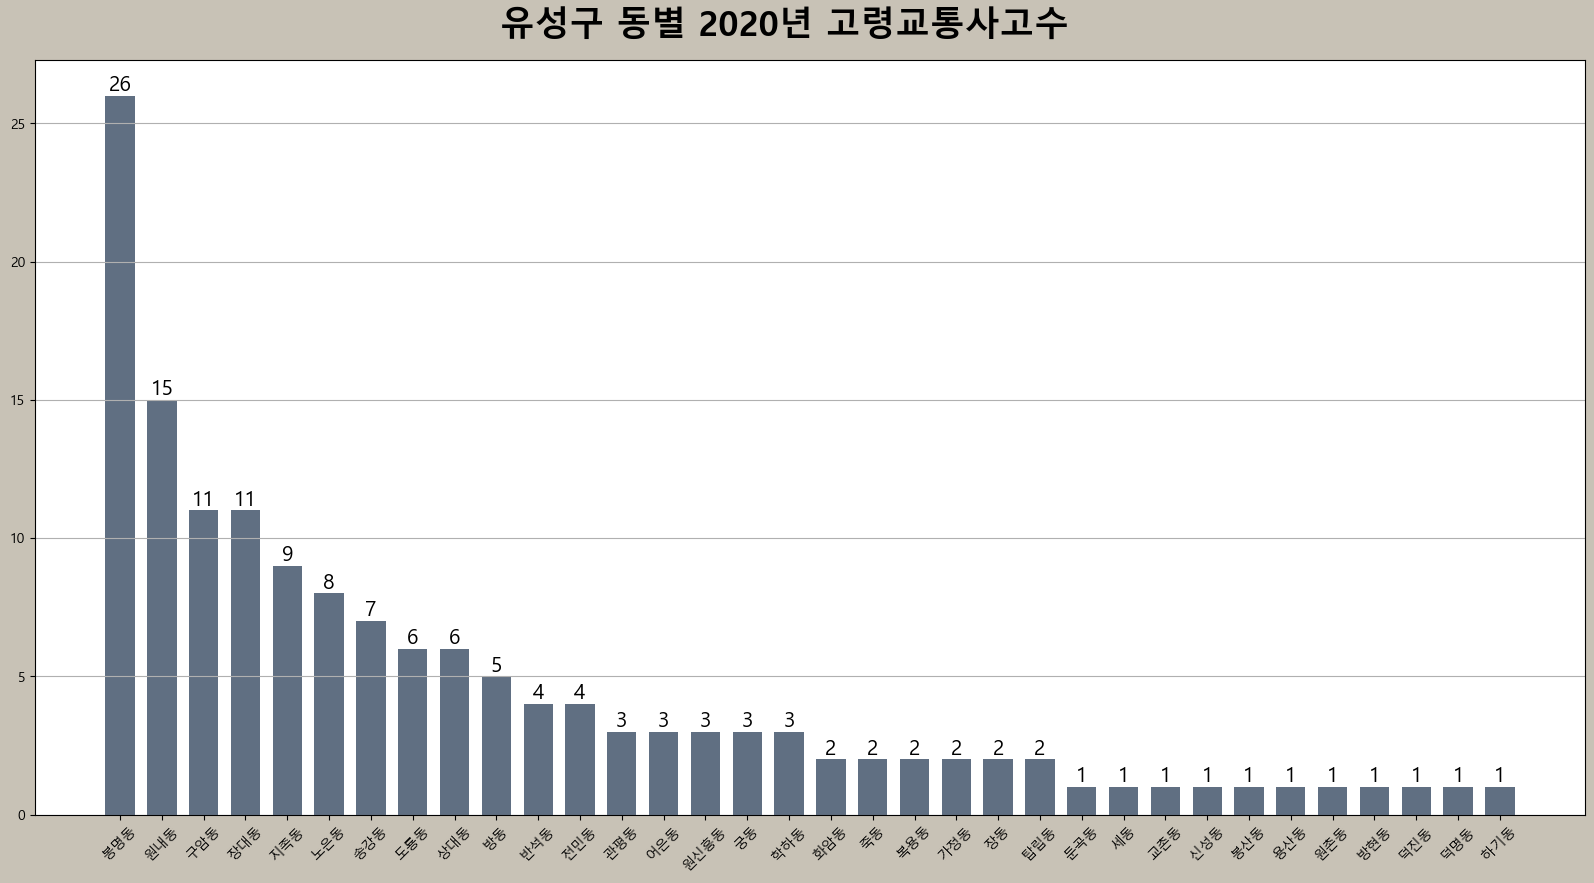

In [138]:
plt.figure(figsize=(20,10), dpi=100, facecolor='#C8C2B6')
X = elder_caracc_Yuseonggu_data[elder_caracc_Yuseonggu_data["고령교통사고수"] != 0]["법정동이름"]
Y = elder_caracc_Yuseonggu_data[elder_caracc_Yuseonggu_data["고령교통사고수"] != 0]["고령교통사고수"]
plt.xticks(rotation=45)
plt.bar(X,Y, color ="#606F82", width = 0.7)
plt.grid(True,axis = 'y')
for i, row in enumerate(range(len(X))):
    plt.text(X[i],Y[i],"{}".format(Y[i]), size = 15, va= "bottom", ha = "center")
plt.suptitle("유성구 동별 2020년 고령교통사고수",fontsize=25,y=0.93, fontweight = 'bold')

## 2. 유성구 동별 유동인구 시각화

In [54]:

flow_Yuseonggu_data = flow_Yuseonggu_data.head(10)

In [55]:
flow_Yuseonggu_data.head()

,법정동이름,새벽,저녁,주간,출근,퇴근
0,가정동,9523.85,27983.74,299278.13,24736.28,32003.84
1,세동,1101.18,8945.00,29825.66,2452.05,5224.31
2,송정동,34134.29,71788.25,130877.27,17653.16,35525.73
3,수남동,144471.35,329480.47,788031.33,92891.80,199287.94
4,신동,7314.33,22538.97,53013.90,4342.06,14310.27


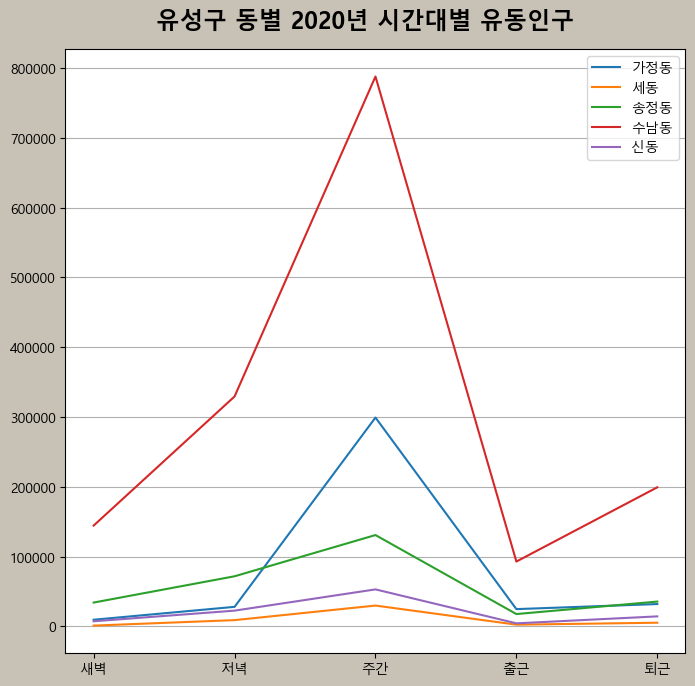

In [184]:
plt.figure(figsize=(8,8), dpi=100, facecolor='#C8C2B6')
X = np.arange(len(flow_Yuseonggu_data.columns)-1)
for num in range(len(flow_Yuseonggu_data)):
    plt.plot(X, flow_Yuseonggu_data.iloc[num,1:])
plt.xticks(X,flow_Yuseonggu_data.columns[1:])
plt.legend(flow_Yuseonggu_data["법정동이름"])
plt.spring()
plt.suptitle("유성구 동별 2020년 시간대별 유동인구",fontsize=17, y=0.93, fontweight = 'bold')
plt.grid(True,axis = 'y')

## 5. 유성구 교통사고 관련 데이터 시각화

In [149]:
muli_Yuseonggu_data=muli_Yuseonggu_data.sort_values(by = ["차량등록대수"], ascending=False)
muli_Yuseonggu_data.head()

,법정동이름,차량등록대수,교통사고수,경로당,cctv개수,노인보호구역,노인보호구역_cctv개수
47,지족동,18745,524,20,31,0,0
23,봉명동,12789,1718,10,50,2,2
3,관평동,11014,415,11,29,2,2
45,전민동,7674,199,10,24,1,1
11,노은동,7103,455,5,22,0,0


Text(0.5, 0.95, '유성구 동별 차량등록대수')

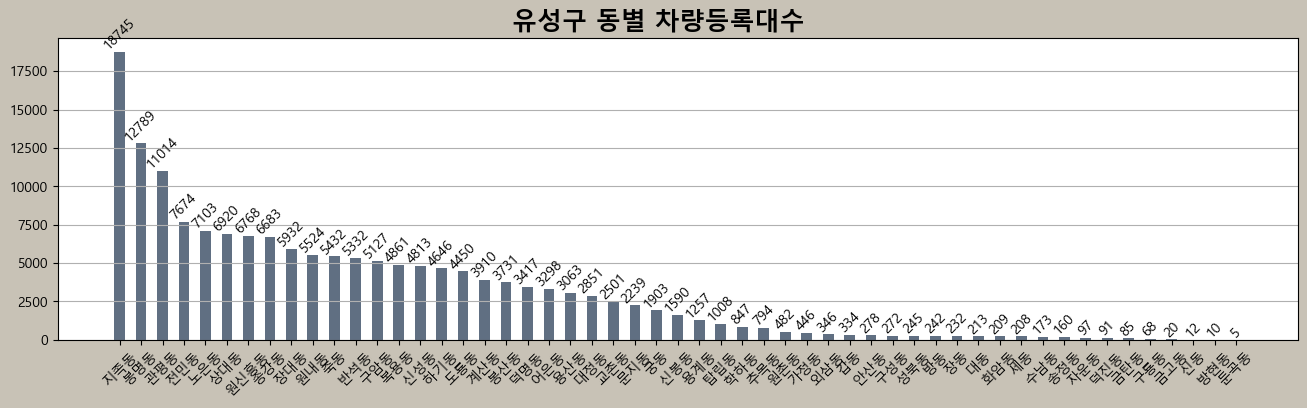

In [154]:
plt.figure(figsize=(16,4), dpi=100, facecolor='#C8C2B6')
X = muli_Yuseonggu_data["법정동이름"]
Y = muli_Yuseonggu_data["차량등록대수"]
plt.grid(True,axis = 'y')
plt.xticks(rotation=45)
plt.bar(X,Y, color = "#606F82", width =0.5)
for i, row in enumerate(range(len(X))):
    plt.text(X[i],Y[i],"{}".format(Y[i]), size = 10, va= "bottom", ha = "center",rotation=45)
plt.suptitle("유성구 동별 차량등록대수",fontsize=18, y=0.95, fontweight = 'bold')

In [156]:
muli_Yuseonggu_data=muli_Yuseonggu_data.sort_values(by = ["교통사고수"], ascending=False)
muli_Yuseonggu_data.head()

,법정동이름,차량등록대수,교통사고수,경로당,cctv개수,노인보호구역,노인보호구역_cctv개수
23,봉명동,12789,1718,10,50,2,2
43,장대동,5932,923,7,43,1,0
7,구암동,5127,621,10,48,3,2
47,지족동,18745,524,20,31,0,0
8,궁동,1903,487,4,26,2,2


Text(0.5, 0.95, '유성구 동별 교통사고수')

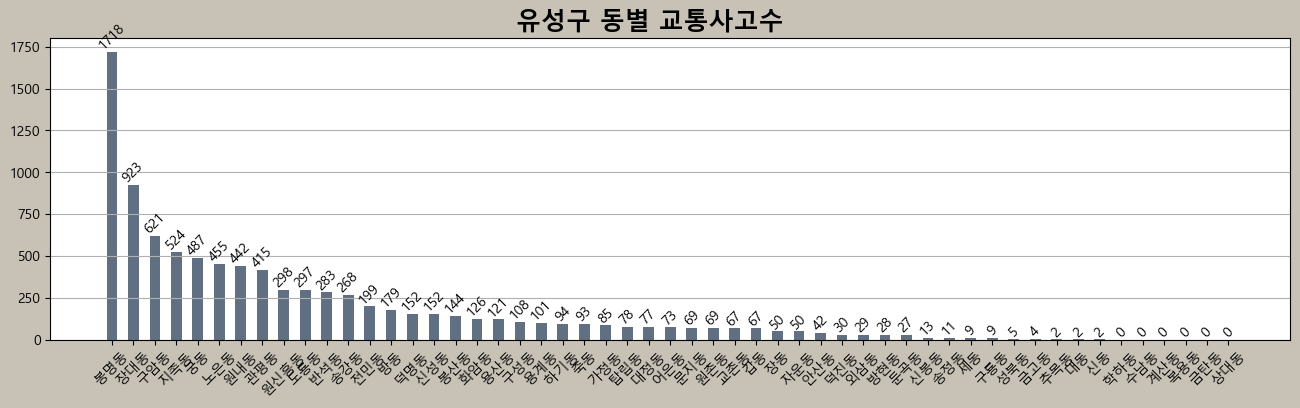

In [158]:
plt.figure(figsize=(16,4), dpi=100, facecolor='#C8C2B6')
X = muli_Yuseonggu_data["법정동이름"]
Y = muli_Yuseonggu_data["교통사고수"]
plt.grid(True,axis = 'y')
plt.xticks(rotation=45)
plt.bar(X,Y, color = "#606F82", width =0.5)
for i, row in enumerate(range(len(X))):
    plt.text(X[i],Y[i],"{}".format(Y[i]), size = 10, va= "bottom", ha = "center",rotation=45)
plt.suptitle("유성구 동별 교통사고수",fontsize=18, y=0.95, fontweight = 'bold')

In [159]:
muli_Yuseonggu_data=muli_Yuseonggu_data.sort_values(by = ["경로당"], ascending=False)
muli_Yuseonggu_data.head()

,법정동이름,차량등록대수,교통사고수,경로당,cctv개수,노인보호구역,노인보호구역_cctv개수
47,지족동,18745,524,20,31,0,0
3,관평동,11014,415,11,29,2,2
23,봉명동,12789,1718,10,50,2,2
7,구암동,5127,621,10,48,3,2
45,전민동,7674,199,10,24,1,1


Text(0.5, 0.95, '유성구 동별 경로당수')

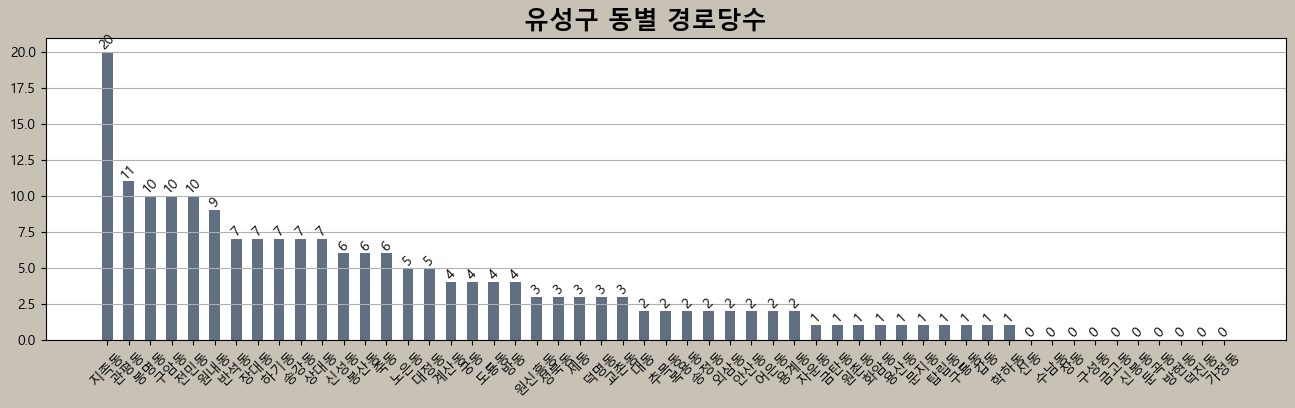

In [161]:
plt.figure(figsize=(16,4), dpi=100, facecolor='#C8C2B6')
X = muli_Yuseonggu_data["법정동이름"]
Y = muli_Yuseonggu_data["경로당"]
plt.grid(True,axis = 'y')
plt.xticks(rotation=45)
plt.bar(X,Y, color = "#606F82", width =0.5)
for i, row in enumerate(range(len(X))):
    plt.text(X[i],Y[i],"{}".format(Y[i]), size = 10, va= "bottom", ha = "center",rotation=45)
plt.suptitle("유성구 동별 경로당수",fontsize=18, y=0.95, fontweight = 'bold')

In [162]:
muli_Yuseonggu_data=muli_Yuseonggu_data.sort_values(by = ["cctv개수"], ascending=False)
muli_Yuseonggu_data.head()

,법정동이름,차량등록대수,교통사고수,경로당,cctv개수,노인보호구역,노인보호구역_cctv개수
23,봉명동,12789,1718,10,50,2,2
7,구암동,5127,621,10,48,3,2
43,장대동,5932,923,7,43,1,0
47,지족동,18745,524,20,31,0,0
3,관평동,11014,415,11,29,2,2


Text(0.5, 0.95, '유성구 동별 cctv개수')

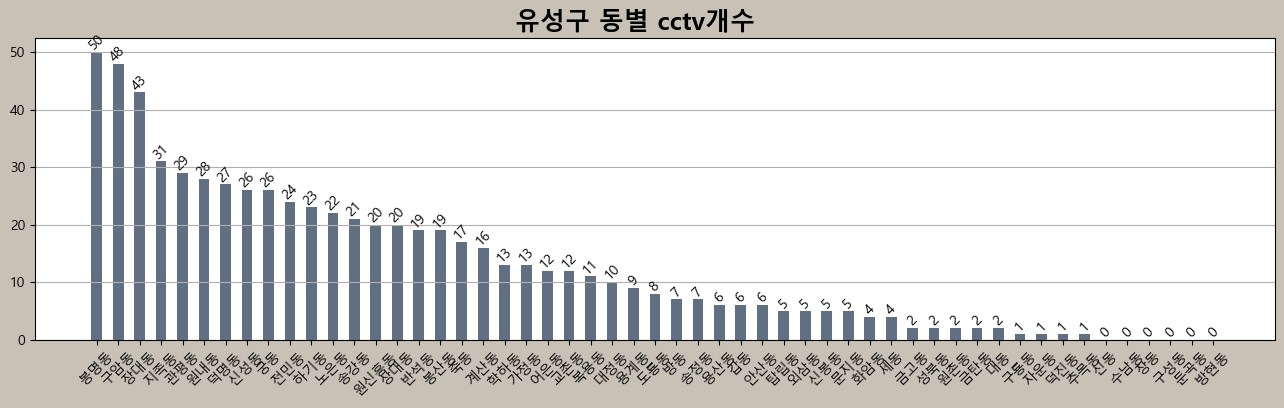

In [164]:
plt.figure(figsize=(16,4), dpi=100, facecolor='#C8C2B6')
X = muli_Yuseonggu_data["법정동이름"]
Y = muli_Yuseonggu_data["cctv개수"]
plt.grid(True,axis = 'y')
plt.xticks(rotation=45)
plt.bar(X,Y, color = "#606F82", width =0.5)
for i, row in enumerate(range(len(X))):
    plt.text(X[i],Y[i],"{}".format(Y[i]), size = 10, va= "bottom", ha = "center",rotation=45)
plt.suptitle("유성구 동별 cctv개수",fontsize=18, y=0.95, fontweight = 'bold')

In [165]:
muli_Yuseonggu_data=muli_Yuseonggu_data.sort_values(by = ["노인보호구역"], ascending=False)
muli_Yuseonggu_data.head()

,법정동이름,차량등록대수,교통사고수,경로당,cctv개수,노인보호구역,노인보호구역_cctv개수
7,구암동,5127,621,10,48,3,2
23,봉명동,12789,1718,10,50,2,2
36,외삼동,346,29,2,5,2,2
3,관평동,11014,415,11,29,2,2
39,원내동,5524,442,9,28,2,2


Text(0.5, 0.95, '유성구 동별 노인보호구역수')

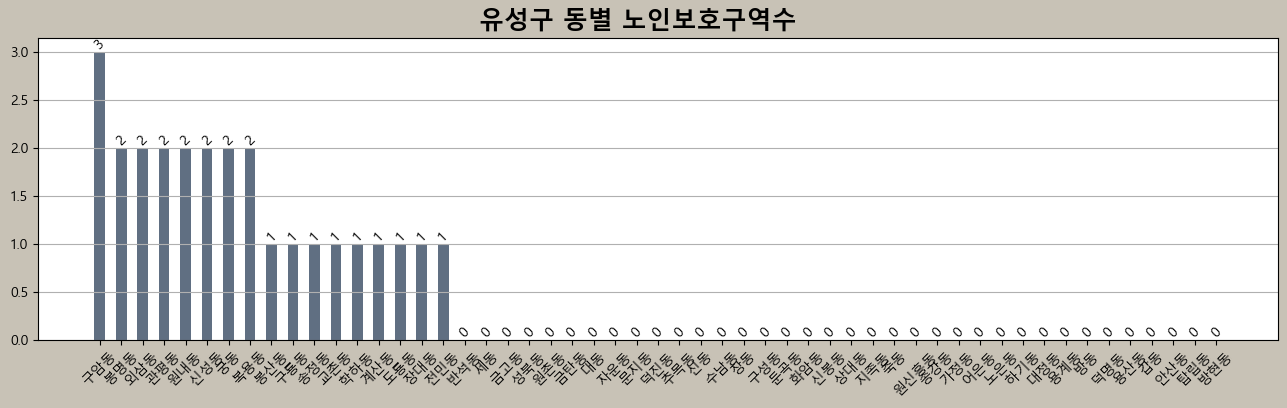

In [166]:
plt.figure(figsize=(16,4), dpi=100, facecolor='#C8C2B6')
X = muli_Yuseonggu_data["법정동이름"]
Y = muli_Yuseonggu_data["노인보호구역"]
plt.grid(True,axis = 'y')
plt.xticks(rotation=45)
plt.bar(X,Y, color = "#606F82", width =0.5)
for i, row in enumerate(range(len(X))):
    plt.text(X[i],Y[i],"{}".format(Y[i]), size = 10, va= "bottom", ha = "center",rotation=45)
plt.suptitle("유성구 동별 노인보호구역수",fontsize=18, y=0.95, fontweight = 'bold')

Text(0.5, 0.95, '유성구 동별 노인보호구역 cctv개수')

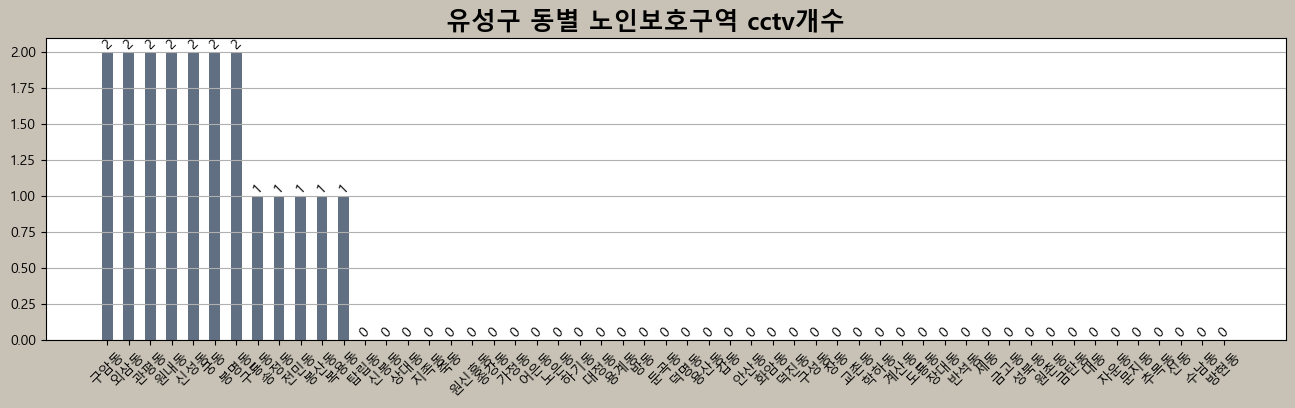

In [167]:
muli_Yuseonggu_data=muli_Yuseonggu_data.sort_values(by = ["노인보호구역_cctv개수"], ascending=False)
muli_Yuseonggu_data.head()
plt.figure(figsize=(16,4), dpi=100, facecolor='#C8C2B6')
X = muli_Yuseonggu_data["법정동이름"]
Y = muli_Yuseonggu_data["노인보호구역_cctv개수"]
plt.grid(True,axis = 'y')
plt.xticks(rotation=45)
plt.bar(X,Y, color = "#606F82", width =0.5)
for i, row in enumerate(range(len(X))):
    plt.text(X[i],Y[i],"{}".format(Y[i]), size = 10, va= "bottom", ha = "center",rotation=45)
plt.suptitle("유성구 동별 노인보호구역 cctv개수",fontsize=18, y=0.95, fontweight = 'bold')